<a href="https://colab.research.google.com/github/burlharlin/sales-predictions/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd



In [2]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
filename = '/content/drive/MyDrive/Coding Dojo/02 Week 2: Pandas/sales_predictions.csv'

df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()
#1)Rows 8523; Columns 12
#2) See Dtype Below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.duplicated().sum()
#There were no duplicates

0

In [6]:
df.isna().sum()
#4) Missing Data---Item_Wieght:1463; Outlet:2410
# Data was removed 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
df.nunique()


Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
df.groupby('Outlet_Size')['Item_Identifier'].count()
# Im going to remove both columns for now, but I will run another one for Outlet_size with 'missing' added

Outlet_Size
High       932
Medium    2793
Small     2388
Name: Item_Identifier, dtype: int64

In [10]:
df.groupby('Item_Fat_Content')['Item_Identifier'].count()

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Identifier, dtype: int64

In [11]:
df.drop(columns=['Item_Weight','Outlet_Size'], inplace = True)
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [13]:
import numpy as np


In [14]:
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


In [15]:
df.groupby('Item_Fat_Content')['Item_Identifier'].count()

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Identifier, dtype: int64

In [16]:
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat':'Low Fat','reg':'Regular'}, inplace = True)

In [17]:
df.groupby('Item_Fat_Content')['Item_Identifier'].count()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Identifier, dtype: int64

In [18]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [19]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import pandas as pd

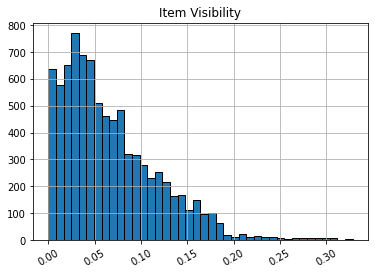

In [36]:
df['Item_Visibility'].hist(bins = 40, edgecolor= 'black')
plt.xticks(rotation = 30);
plt.title("Item Visibility");

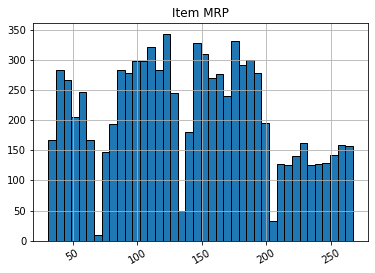

In [37]:
df['Item_MRP'].hist(bins = 40, edgecolor= 'black')
plt.xticks(rotation = 30);
plt.title("Item MRP");

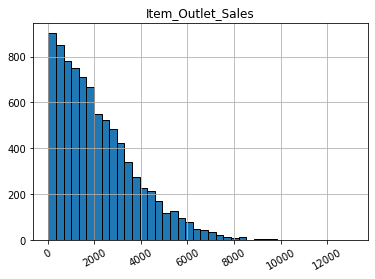

In [39]:
df['Item_Outlet_Sales'].hist(bins = 40, edgecolor= 'black')
plt.xticks(rotation = 30);
plt.title('Item_Outlet_Sales');

In [41]:
corr = df.corr()

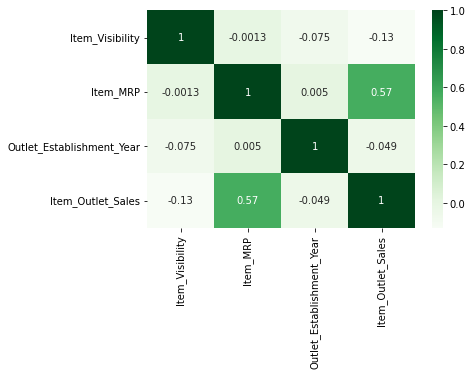

In [43]:
sns.heatmap(corr, cmap = 'Greens', annot= True);

In [44]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [46]:
Tier_Count = df['Outlet_Location_Type'].value_counts()
Tier_Count

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [47]:
Outlet_Count = df['Outlet_Type'].value_counts()
Outlet_Count


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

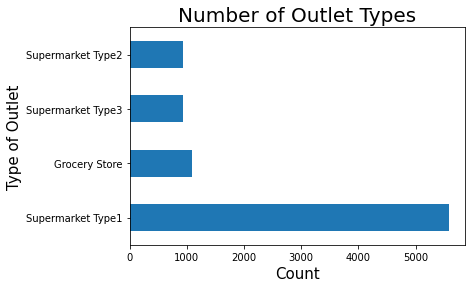

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [54]:
Outlet_Count.plot(kind = 'barh')
plt.title('Number of Outlet Types', fontsize = 20)
plt.ylabel('Type of Outlet',fontsize = 15)
plt.xlabel('Count',fontsize = 15)
plt.show()
Outlet_Count

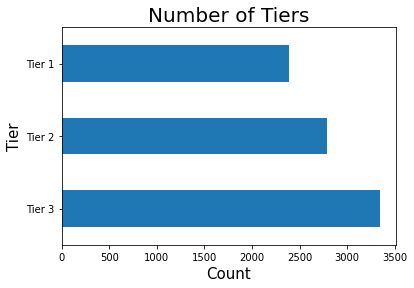

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [56]:
Tier_Count.plot(kind = 'barh')
plt.title('Number of Tiers', fontsize = 20)
plt.ylabel('Tier',fontsize = 15)
plt.xlabel('Count',fontsize = 15)
plt.show()
Tier_Count

In [57]:
df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()

Outlet_Type
Grocery Store        3.680343e+05
Supermarket Type1    1.291734e+07
Supermarket Type2    1.851823e+06
Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

In [58]:
df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [61]:
df.groupby('Item_Type')['Item_Outlet_Sales'].mean()

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

In [79]:
 Item_Sales = round(df.groupby(['Item_Type','Outlet_Location_Type'])['Item_Outlet_Sales'].describe(),0)
 Item_Sales

count    mean     std    min  \
Item_Type             Outlet_Location_Type                                 
Baking Goods          Tier 1                185.0  1766.0  1521.0   37.0   
                      Tier 2                211.0  2053.0  1409.0  205.0   
                      Tier 3                252.0  2007.0  1666.0   49.0   
Breads                Tier 1                 67.0  2049.0  1703.0   84.0   
                      Tier 2                 84.0  2275.0  1491.0  168.0   
                      Tier 3                100.0  2248.0  1734.0   35.0   
Breakfast             Tier 1                 33.0  1533.0  1608.0   51.0   
                      Tier 2                 32.0  2417.0  1489.0  276.0   
                      Tier 3                 45.0  2319.0  2291.0   40.0   
Canned                Tier 1                177.0  1853.0  1518.0   38.0   
                      Tier 2                222.0  2458.0  1426.0  210.0   
                      Tier 3                250.0  2282.0  1860.0   42.0   
Dairy                 Tier 1                205.0  1809.0  1550.0   41.0   
                      Tier 2                214.0  2456.0  1834.0  181.0   
                      Tier 3                263.0  2380.0  2103.0   47.0   
Frozen Foods          Tier 1                250.0  1897.0  1603.0   37.0   
                      Tier 2                279.0  2258.0  1592.0  172.0   
                      Tier 3                327.0  2206.0  1902.0   37.0   
Fruits and Vegetables Tier 1                337.0  1970.0  1599.0   61.0   
                      Tier 2                399.0  2382.0  1558.0  114.0   
                      Tier 3                496.0  2431.0  2066.0   45.0   
Hard Drinks           Tier 1                 58.0  1885.0  1450.0   38.0   
                      Tier 2                 72.0  2245.0  1429.0  332.0   
                      Tier 3                 84.0  2224.0  1835.0   72.0   
Health and Hygiene    Tier 1                138.0  1862.0  1675.0   35.0   
                      Tier 2                166.0  2094.0  1257.0  146.0   
                      Tier 3                216.0  2040.0  1675.0   38.0   
Household             Tier 1                250.0  1970.0  1570.0   41.0   
                      Tier 2                296.0  2415.0  1370.0  100.0   
                      Tier 3                364.0  2330.0  1968.0   33.0   
Meat                  Tier 1                123.0  1725.0  1404.0  121.0   
                      Tier 2                125.0  2285.0  1341.0  324.0   
                      Tier 3                177.0  2371.0  2025.0   48.0   
Others                Tier 1                 56.0  1676.0  1541.0   40.0   
                      Tier 2                 52.0  2223.0  1300.0  320.0   
                      Tier 3                 61.0  1903.0  1412.0   55.0   
Seafood               Tier 1                 19.0  2078.0  1985.0  150.0   
                      Tier 2                 22.0  2696.0  1799.0  453.0   
                      Tier 3                 23.0  2177.0  1789.0  158.0   
Snack Foods           Tier 1                334.0  1948.0  1527.0   34.0   
                      Tier 2                401.0  2382.0  1566.0  141.0   
                      Tier 3                465.0  2424.0  1902.0   46.0   
Soft Drinks           Tier 1                120.0  1606.0  1447.0   41.0   
                      Tier 2                157.0  2160.0  1543.0  133.0   
                      Tier 3                168.0  2149.0  1892.0   33.0   
Starchy Foods         Tier 1                 36.0  2290.0  1733.0  184.0   
                      Tier 2                 53.0  2645.0  1904.0  252.0   
                      Tier 3                 59.0  2183.0  1675.0   59.0   

                                               25%     50%     75%      max  
Item_Type             Outlet_Location_Type                                   
Baking Goods          Tier 1                 565.0  1212.0  2694.0   6093.0  
         

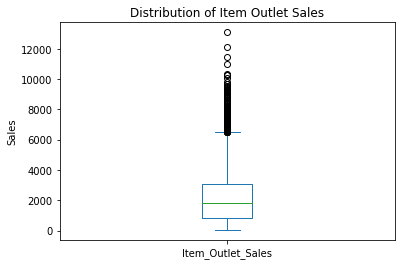

In [69]:
df['Item_Outlet_Sales'].plot(kind='box');
plt.title('Distribution of Item Outlet Sales')
plt.ylabel('Sales');

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


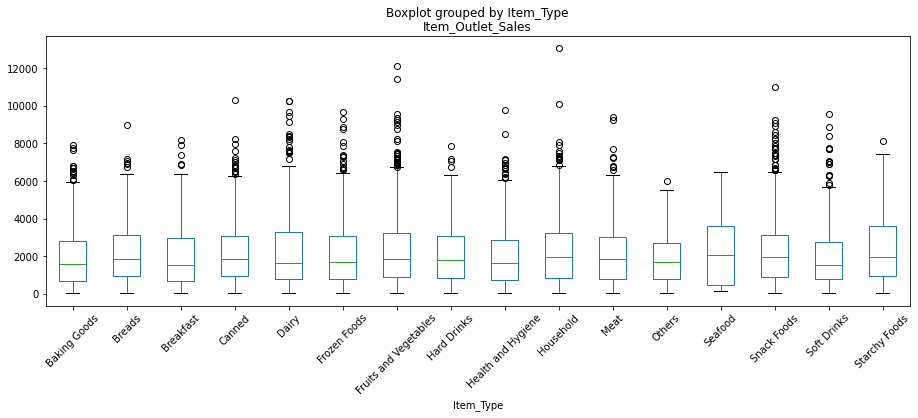

In [71]:

df.boxplot('Item_Outlet_Sales',
  by = 'Item_Type',
  figsize = (15,5),
  rot = 45,
  grid=False
)



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


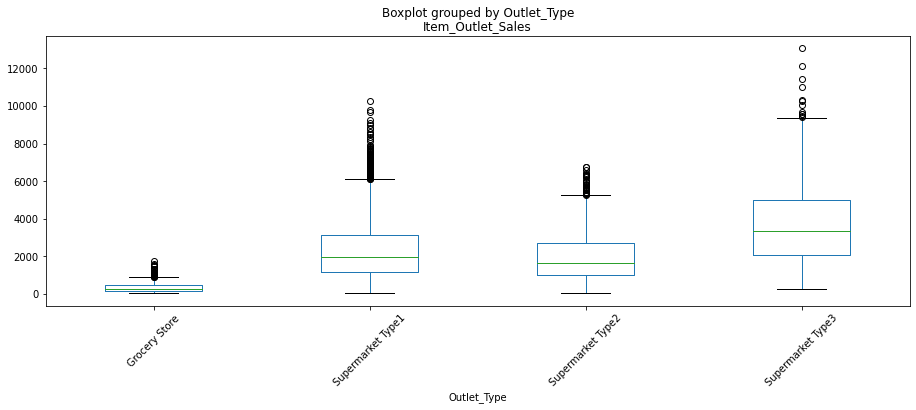

In [72]:
df.boxplot('Item_Outlet_Sales',
  by = 'Outlet_Type',
  figsize = (15,5),
  rot = 45,
  grid=False
)